In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
import numpy as np
import pylab as pl
pl.style.use('fivethirtyeight')

In [19]:
# Details from assignment pdf:
# Opening 2017
# 2.3 people/1000 sf
# 460k sf
# no onstreet parking
# 9am-9pm hours

# Source of building contents:
# https://www.nyu.edu/content/dam/nyu/govCommunAffairs/documents/nyu-in-nyc/brooklyn/2014-07-29-370-Jay-St-Presentation-Downloadable.pdf
# 450k sf above ground space
# 3 floors for CUSP (150k sf) (office)
# 27k sf retail on first floor
# 40k sf incubator (office)
# 233k sf left for NYU (mixed classroom office? - 50/50?)
# Do we consider cusp as new since it's moving and vacating another location?

total = 450
retail = 27
office_min = 190
office_max = 383
school_min = 40
school_max = 233

#Using http://www.nyc.gov/html/oec/downloads/pdf/2014_ceqr_tm/16_Transportation_2014.pdf for trip generation rates

trips = {
    'office': {
        'trips': 18,
        'am': .12,
        'mid': .15,
        'pm': .14,
    },
    'uni': {
        'trips': 26.6,
        'am': .16,
        'mid': .15, #Was N/A in CEQR, assume similar to office
        'pm': .26
    },
    'local': {
        'trips': 205,
        'am': .03,
        'mid': .19,
        'pm': .10
    },
    'dest': {
        'trips': 78.2,
        'am': .03,
        'mid': .09,
        'pm': .09
    }
}

In [28]:
generated = []
gen_am = []

office = np.arange(office_min, office_max+1)
school = total - retail - office
local_retail_percent = np.arange(0,1.01,.01)
dest_retail_percent = 1 - local_retail_percent

for i in range(101):
    retailg = local_retail_percent[i]*retail*trips['local']['trips'] + dest_retail_percent[i]*retail*trips['dest']['trips']
    generated.append(office*trips['office']['trips'] + school*trips['uni']['trips'] + retailg)
    
    am =    local_retail_percent[i]*retail*trips['local']['trips']*trips['local']['am'] + \
            dest_retail_percent[i]*retail*trips['dest']['trips']*trips['dest']['am'] + \
            office*trips['office']['trips']*trips['office']['am'] + \
            school*trips['uni']['trips']*trips['uni']['am']
            
    gen_am.append(am)
    


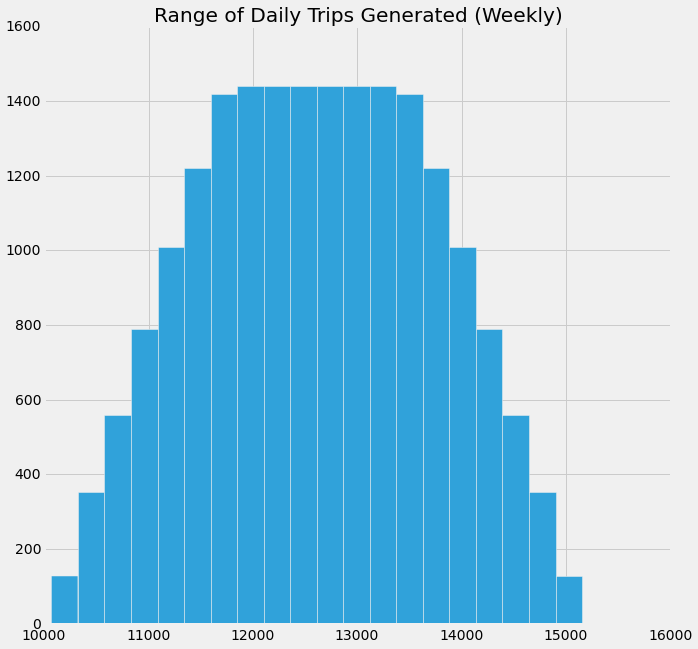

In [30]:
figure, ax = pl.subplots(figsize=(10,10))
pl.hist(np.array(generated).flatten(), 20)
ax.set_title('Range of Daily Trips Generated (Weekday)')

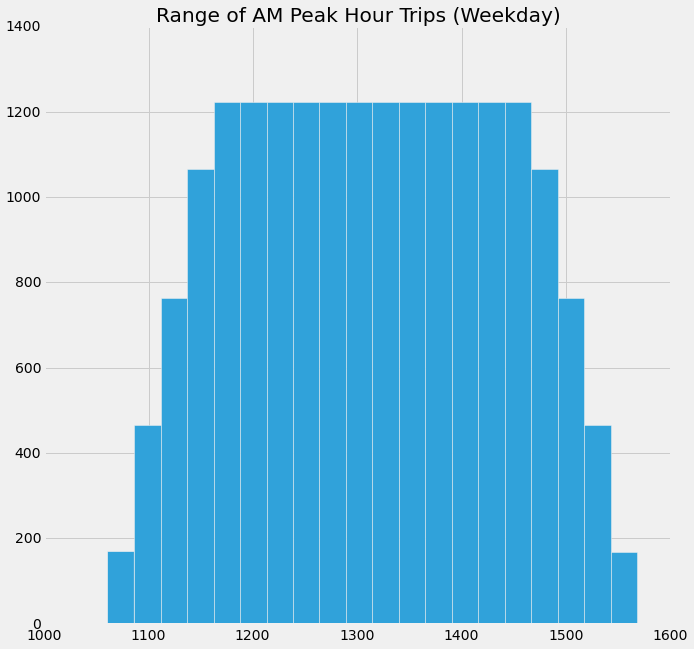

In [31]:
figure, ax = pl.subplots(figsize=(10,10))
pl.hist(np.array(gen_am).flatten(), 20)
ax.set_title('Range of AM Peak Hour Trips (Weekday)')